2.1

Read the file train.csv into Python and print a few rows.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

import numpy as np
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Calculate the number of surviving/non-surviving passengers and display it as a bar plot.


In [4]:
survivedPassangers=df['Survived'].value_counts()
survivedPassangers=survivedPassangers.rename(index={0:'Servived',1:'Non-servived'})
survivedPassangers

Servived        549
Non-servived    342
Name: Survived, dtype: int64

Text(0, 0.5, 'Number of Passengers')

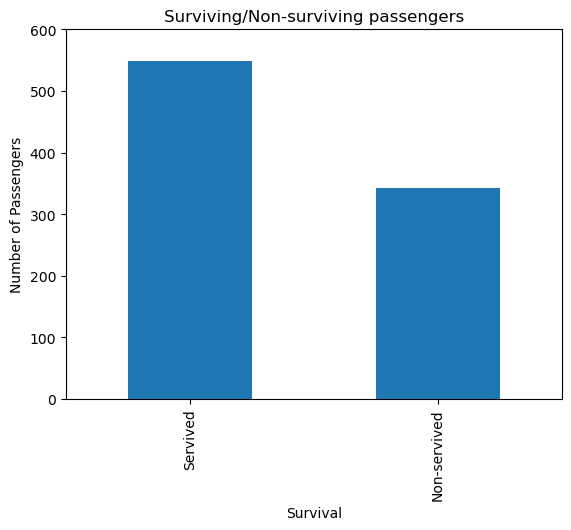

In [5]:
survivedPassangers.plot(kind='bar',ylim=(0, 600))
plt.title('Surviving/Non-surviving passengers')
plt.xlabel("Survival")
plt.ylabel("Number of Passengers")

Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.

In [6]:
firstClassServived=df[(df['Survived']==1) & (df['Pclass']==1)]

In [7]:
firstClass = df[df['Pclass']==1]

In [8]:
proportion = len(firstClassServived)/len(firstClass)
proportion

0.6296296296296297

Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.

Text(0, 0.5, 'Number of Passenger')

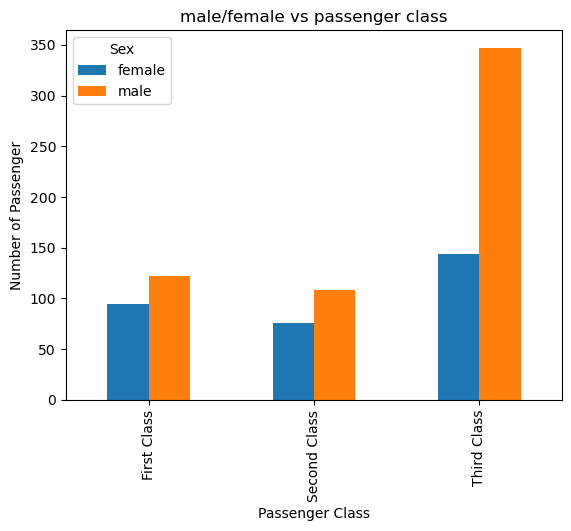

In [9]:
pclassNdSex=df.groupby(['Pclass','Sex']).count()['PassengerId'].unstack()
pclassNdSex=pclassNdSex.rename(index={1:'First Class',2:'Second Class',3:'Third Class'})
pclassNdSex.plot(kind='bar')
plt.title('male/female vs passenger class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passenger')

Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.

<AxesSubplot:ylabel='Frequency'>

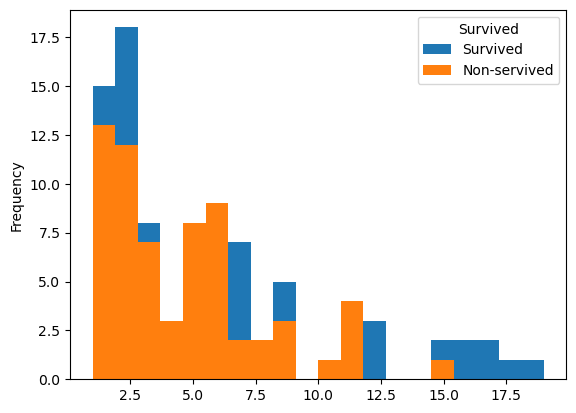

In [10]:
ageNdServived=df.groupby(['Age','Survived']).count()['PassengerId'].unstack()
ageNdServived=ageNdServived.rename(columns={0:'Survived',1:'Non-servived'})
ageNdServived.plot(kind='hist',bins=20)

Calculate the average age for survived and drowned passengers separately.

In [11]:
survivedMean=df['Age'].loc[df['Survived']==1].mean()
survivedMean

28.343689655172415

In [12]:
nonSurvivedMean=df['Age'].loc[df['Survived']==0].mean()
nonSurvivedMean

30.62617924528302

Replace missing age values by the mean age.

In [13]:
df['Age'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [14]:
condition=df['Survived']==1
df['Age'] = df['Age'].fillna(condition.map({True:round(28.343689655172415), False: round(30.62617924528302)}))
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,31.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.

In [15]:
df.groupby(['Survived','Pclass','Sex'])['PassengerId'].count()

Survived  Pclass  Sex   
0         1       female      3
                  male       77
          2       female      6
                  male       91
          3       female     72
                  male      300
1         1       female     91
                  male       45
          2       female     70
                  male       17
          3       female     72
                  male       47
Name: PassengerId, dtype: int64

Machine Learning

In [16]:
X = df.drop(["Survived"], axis=1)
y = df["Survived"]

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=100)

In [18]:
m = DummyClassifier(strategy='stratified')

In [19]:
m.fit(x_train,y_train)

DummyClassifier(strategy='stratified')

In [20]:
m.classes_

array([0, 1])

In [21]:
#prediction
target_pred = m.predict(x_train)
target_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,

In [22]:
target_pred_test = m.predict(x_test)
target_pred_test

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0])

In [23]:
#calculate score of train data
m.score(x_train,y_train)

0.5508982035928144

In [24]:
#calculate score of test data
m.score(x_test,y_test)

0.515695067264574

In [25]:
y_train.values

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,

<AxesSubplot:>

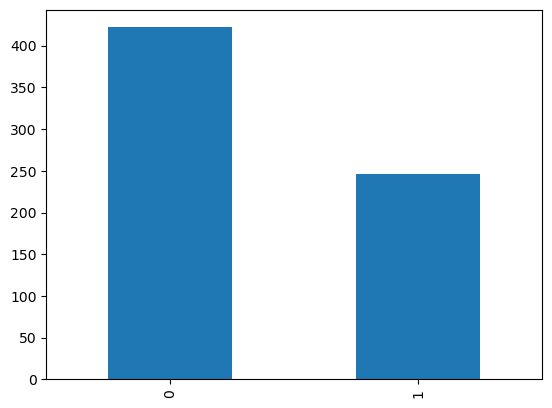

In [26]:
y_train.value_counts().plot.bar()

<AxesSubplot:xlabel='Survived', ylabel='count'>

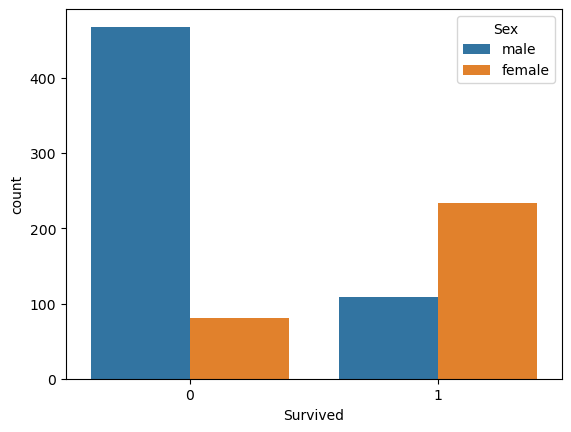

In [27]:
sns.countplot(x="Survived", data=df, hue="Sex")

In [28]:
df.groupby(['Survived','Sex','Pclass']).count()

PassengerId  Name  Age  SibSp  Parch  Ticket  Fare  \
Survived Sex    Pclass                                                       
0        female 1                 3     3    3      3      3       3     3   
                2                 6     6    6      6      6       6     6   
                3                72    72   72     72     72      72    72   
         male   1                77    77   77     77     77      77    77   
                2                91    91   91     91     91      91    91   
                3               300   300  300    300    300     300   300   
1        female 1                91    91   91     91     91      91    91   
                2                70    70   70     70     70      70    70   
                3                72    72   72     72     72      72    72   
         male   1                45    45   45     45     45      45    45   
                2                17    17   17     17     17      17    17   
                3                47    47   47     47     47      47    47   

                        Cabin  Embarked  
Survived Sex    Pclass                   
0        female 1           3         3  
                2           1         6  
                3           2        72  
         male   1          56        77  
                2           2        91  
                3           4       300  
1        female 1          78        89  
                2           9        70  
                3           4        72  
         male   1          39        45  
                2           4        17  
                3           2        47

In [29]:
pd.DataFrame(df.groupby(['Survived','Sex','Pclass']).count()['PassengerId'])

PassengerId
Survived Sex    Pclass             
0        female 1                 3
                2                 6
                3                72
         male   1                77
                2                91
                3               300
1        female 1                91
                2                70
                3                72
         male   1                45
                2                17
                3                47